First we load and sort the data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import h5py
import numpy as np
import os

/Users/mattzhang/py2_kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# load data
data = h5py.File("../../../Data/EC2_blocks_1_8_9_15_76_89_105_CV_HG_align_window_-0.5_to_0.79_file_nobaseline.h5")
X_data = data['Xhigh gamma'][:]
y_data = data['y'][:] # phoneme label

In [3]:
# preprocessing
X_data = np.divide(X_data, np.amax(X_data)) # normalize ECoG signal

In [4]:
# sort by phonemes
sort_order = y_data.argsort() # sort by phonemes
X_data = X_data[sort_order]
y_data = y_data[sort_order]

In [5]:
# calculate averages for each phoneme
X_averages = []
for phoneme in range(max(y_data)+1):
    indices = [y_data == phoneme]
    X_averages.append(np.mean(X_data[indices], axis=0))

Next we look at the SVD, PCA, and CUR decompositions of the first event, just to see what it looks like. We keep 50% of the data.

In [7]:
import pymf
import seaborn as sb

In [8]:
#for i in range(10):
#    pymf.SVD(X_data[i])

In [9]:
SVD = pymf.SVD(X_data[0])
SVD.factorize()

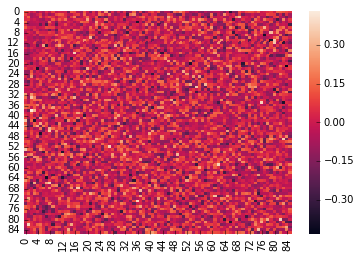

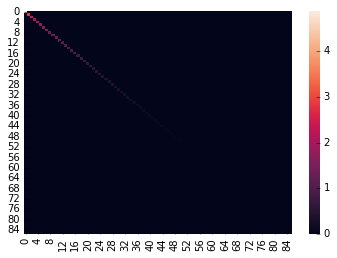

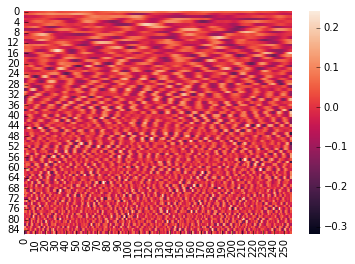

In [10]:
sb.heatmap(SVD.U);
plt.show()
sb.heatmap(SVD.S);
plt.show()
sb.heatmap(SVD.V);
plt.show()

In [17]:
normalized_diagonal = SVD.S.diagonal()/sum(SVD.S.diagonal())

In [59]:
keep_data = 0.5
sum_data = 0
n_kept_dimensions = 0
for i in range(len(normalized_diagonal)):
    sum_data += normalized_diagonal[i]
    if sum_data > keep_data:
        n_kept_dimensions = i
        break

In [60]:
n_kept_dimensions

8

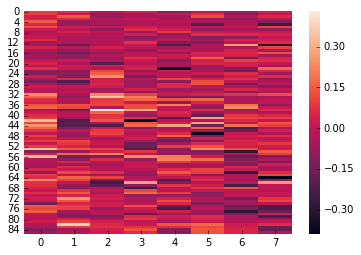

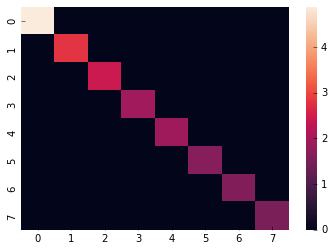

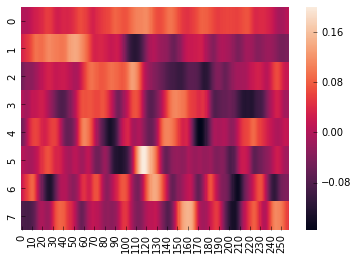

In [61]:
sb.heatmap(SVD.U[:,:n_kept_dimensions])
plt.show()
sb.heatmap(SVD.S[:n_kept_dimensions,:n_kept_dimensions])
plt.show()
sb.heatmap(SVD.V[:n_kept_dimensions,:])
plt.show()

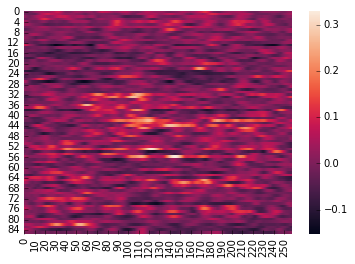

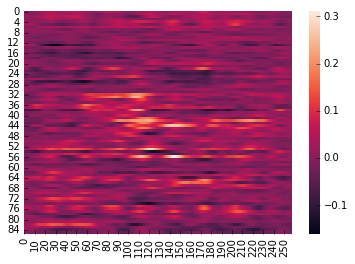

In [62]:
sb.heatmap(X_data[0])
plt.show()
sb.heatmap(SVD.U[:,:n_kept_dimensions].dot(SVD.S[:n_kept_dimensions,:n_kept_dimensions]).dot(SVD.V[:n_kept_dimensions,:]))
plt.show()

 The PCA function is similar to SVD with the number of reduced dimensions specified.

In [63]:
PCA = pymf.PCA(X_data[0], num_bases=8)
PCA.factorize()

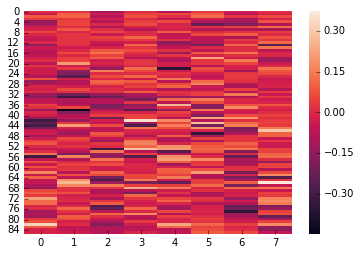

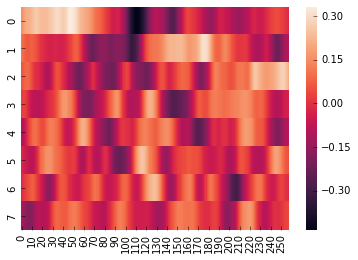

In [64]:
sb.heatmap(PCA.W);
plt.show()
sb.heatmap(PCA.H);
plt.show()

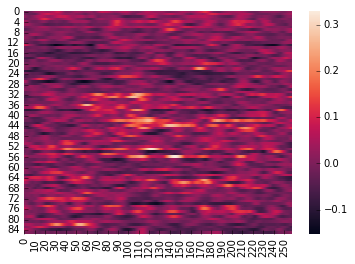

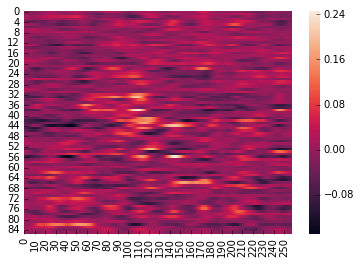

In [65]:
sb.heatmap(X_data[0])
plt.show()
sb.heatmap(PCA.W.dot(PCA.H))
plt.show()

And now CUR.

In [13]:
CUR = pymf.CUR(X_data[0])
CUR.factorize()

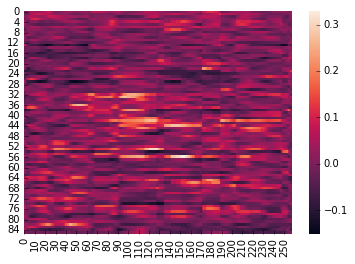

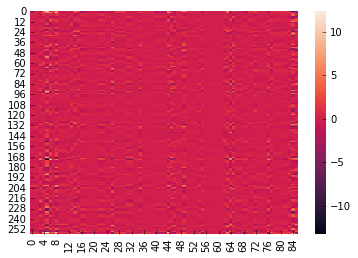

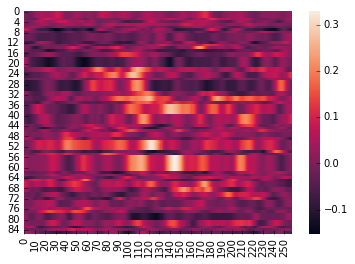

In [14]:
sb.heatmap(CUR.U);
plt.show()
sb.heatmap(CUR.S);
plt.show()
sb.heatmap(CUR.V);
plt.show()